**PROBLEMA DE PRUEBA**
---

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linalg as la
from time import time

# Definición de la función y utilidades

In [55]:
u = lambda x: (100 + 90) * (np.sqrt(x[0] ** 2 + (x[1] + 1) ** 2) - 1) ** 2 + 90 - (20 * x[0] + 40 * x[1])

def gradient(x, delta):
    g = np.zeros(2)
    g[0] = (u([x[0] + delta, x[1]]) - u([x[0] - delta, x[1]])) / (2 * delta)
    g[1] = (u([x[0], x[1] + delta]) - u([x[0], x[1] - delta])) / (2 * delta)
    return g

def golden(x, search, xi, eps):
    a = xi[0]
    b = xi[1]
    tau = 0.381967
    alpha1 = a*(1-tau) + b*tau
    alpha2 = a*tau + b*(1-tau)
    falpha1 = u(x+alpha1*search)
    falpha2 = u(x+alpha2*search)
    for i in range(100):
        if falpha1 > falpha2:
            a = alpha1
            alpha1 = alpha2
            falpha1 = falpha2
            alpha2 = tau*a + (1-tau)*b
            falpha2 = u(x+alpha2*search)
        else:
            b = alpha2
            alpha2 = alpha1
            falpha2 = falpha1
            alpha1 = tau*b + (1-tau)*a
            falpha1 = u(x+alpha1*search)

        if np.abs(u(x+alpha1*search)- u(x+alpha2*search)) < eps:
            break
    return alpha1,falpha1

# Gráfica 2D

No handles with labels found to put in legend.


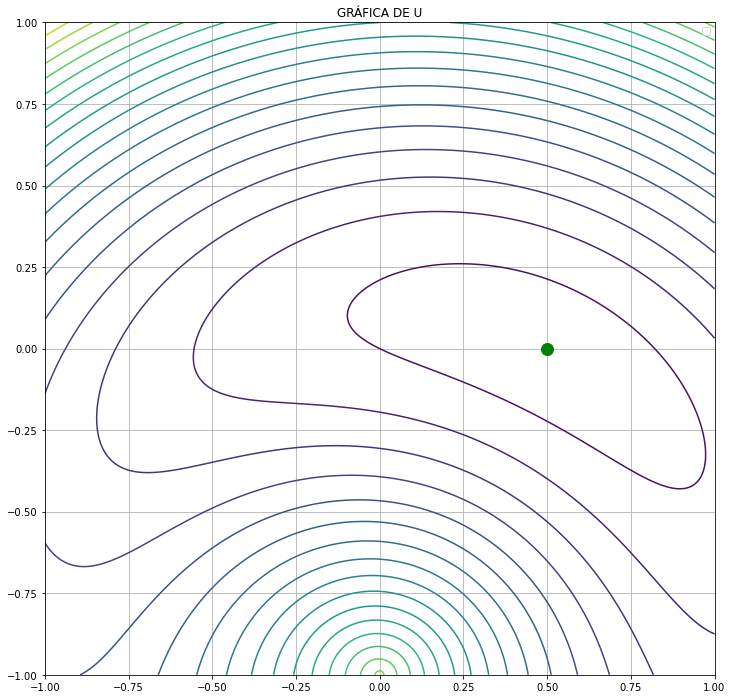

In [48]:
%matplotlib inline
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
xx, yy = np.meshgrid(x, y)
z = u([xx, yy])
plt.figure(figsize=(12, 12))
plt.title(label=f'GRÁFICA DE U')
plt.contour(x, y, z, 20)
plt.plot(0.5, 0, 'go--', linewidth=2, markersize=12)
plt.grid()
plt.legend()
plt.show()

# Gráfica 3D

In [49]:
%matplotlib qt
fig = plt.figure();
ax = fig.gca(projection='3d');
ax.plot_surface(xx, yy, z, cmap=cm.coolwarm,linewidth=0, antialiased=False);
plt.plot(0.5, 0, u(0.5, 0), 'go--', linewidth=2, markersize=12)

/tmp/ipykernel_8405/2164105516.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d');


TypeError: <lambda>() takes 1 positional argument but 2 were given

# Descenso más pronunciado

In [59]:
# Tolerancia
epsilon1 = 0.001
epsilon2 = 0.001
delta = 0.001

# Registra tiempo de inicio del algoritmo.
start_time = time()

xlim = [-1, 1]
x = [-1, 1]
fprev = u(x)

# Realiza las iteraciones del algoritmo
for i in range(1, 5000):
    grad = gradient(x, delta)
    si = -grad
    alpha, fcurr = golden(x, si, xlim, epsilon1)
    if abs(fcurr - fprev < epsilon1) or la.norm(grad) < epsilon1:
        break
    fprev = fcurr
    x = x + alpha * si
    print()
    


# Registra tiempo de finalización del algoritmo.
end_time = time()

# Calcula tiempo transcurrido en milisegundos.
elapsed_time = time() - start_time
elapsed_time = elapsed_time * 1000

print("Tiempo transcurrido: %f ms." % elapsed_time )

Tiempo transcurrido: 3.183365 ms.
